**Assignment No.: 09** 

1.   Name: Aditya Sonawane
2.   Roll No.: 31101



In [1]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np 
import pandas as pd 

In [6]:
from sklearn import datasets

In [48]:
titanic = sns. load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
titanic.shape

(891, 15)

In [9]:
#getting sum of occurance of diffant values in a row
titanic["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [10]:
#getting sum of occurance of diffant values in a row
titanic["alive"].value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [11]:
#getting sum of occurance of diffant values in a row
titanic["class"].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [12]:
#getting sum of occurance of diffant values in a row
titanic["who"].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [13]:
#getting sum of occurance of diffant values in a row
titanic["fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

In [14]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [50]:
#chaking null values in each columns
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [51]:
#dropping the columns from DataFrame
titanic = titanic.drop("deck",axis=1)
titanic = titanic.drop("embark_town",axis=1)
titanic = titanic.drop("embarked",axis=1)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,5,22.0,1,0,7.2500,7,4,True,0,False
1,1,1,6,38.0,1,0,71.2833,8,2,False,1,False
2,1,3,6,26.0,0,0,7.9250,7,2,False,1,True
3,1,1,6,35.0,1,0,53.1000,8,2,False,1,False
4,0,3,5,35.0,0,0,8.0500,7,4,True,0,True


In [52]:
titanic.dropna(subset = ["age"], inplace=True)

In [53]:
#chaking null values in each columns
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [54]:
#converting categorical variable into quantitative variable
encoding={
    "no":0,
    "yes":1,
    "man":4,
    "woman":2,
    "child":3,
    "male":5,
    "female":6,
    "Third":7,
    "First":8,
    "Second":9 


}
encode_dict={
    "alive":encoding,
    "who":encoding,
    "sex":encoding,
    "class":encoding,
    "alone":encoding
}
titanic.replace(encode_dict, inplace=True)
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,5,22.0,1,0,7.2500,7,4,True,0,False
1,1,1,6,38.0,1,0,71.2833,8,2,False,1,False
2,1,3,6,26.0,0,0,7.9250,7,2,False,1,True


In [33]:
tempTitanic = titanic
#dropping the columns from DataFrame
tempTitanic = tempTitanic.drop("adult_male",axis=1)
tempTitanic = tempTitanic.drop("alone",axis=1)
tempTitanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,alive
0,0,3,5,22.0,1,0,7.2500,7,4,0
1,1,1,6,38.0,1,0,71.2833,8,2,1
2,1,3,6,26.0,0,0,7.9250,7,2,1
3,1,1,6,35.0,1,0,53.1000,8,2,1
4,0,3,5,35.0,0,0,8.0500,7,4,0


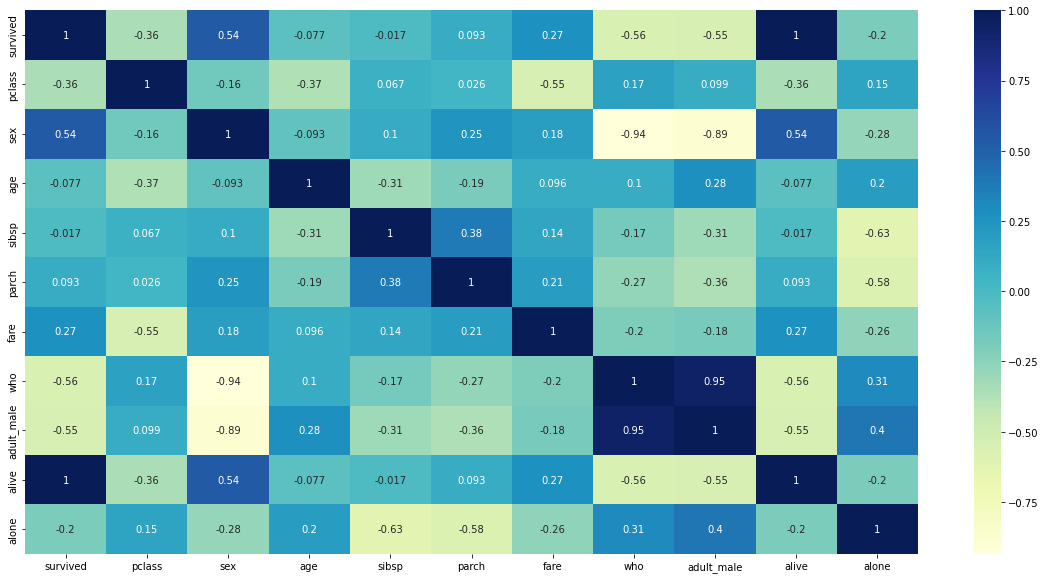

In [55]:
plt.figure(figsize=(20, 10))
dataplot = sns.heatmap(titanic.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [62]:
# Let's summarize the data to see the distribution of data
print(tempTitanic.describe().transpose())

          count       mean        std  min   25%      50%     75%       max
survived  714.0   0.406162   0.491460  0.0  0.00   0.0000   1.000    1.0000
pclass    714.0   2.236695   0.838250  1.0  1.00   2.0000   3.000    3.0000
sex       714.0   5.365546   0.481921  5.0  5.00   5.0000   6.000    6.0000
sibsp     714.0   0.512605   0.929783  0.0  0.00   0.0000   1.000    5.0000
fare      714.0  34.694514  52.918930  0.0  8.05  15.7417  33.375  512.3292
who       714.0   3.273109   0.900166  2.0  2.00   4.0000   4.000    4.0000
alive     714.0   0.406162   0.491460  0.0  0.00   0.0000   1.000    1.0000


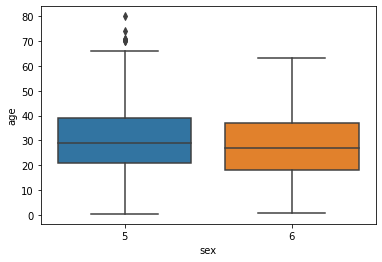

In [56]:
ax = sns.boxplot(x="sex", y="age", data=titanic)

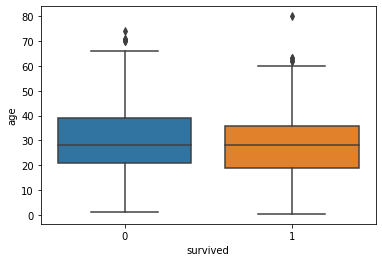

In [57]:
ax = sns.boxplot(x="survived", y="age", data=titanic)

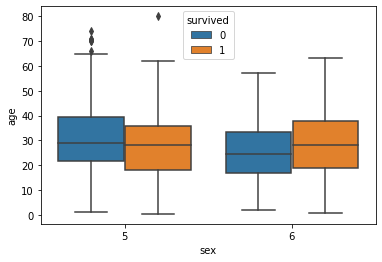

In [60]:
sns.boxplot(titanic['sex'], titanic['age'], hue = titanic["survived"])
plt.show()

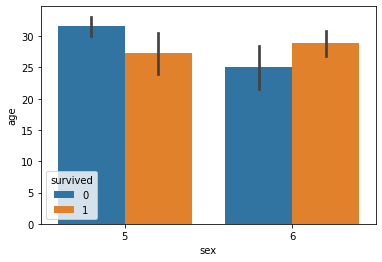

In [61]:
sns.barplot(titanic['sex'], titanic['age'], hue = titanic["survived"])
plt.show()

From above graphs we can obsorve that more males died as compare to females. Max age of male is upto 40 and for female it is upto 30. They also has some ouliers above 65.